# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# This code was prepared by Joseph DeVito for Challenge 6 of the Northwestern Data Science & Visualization Bootcamp.
# This code was prepared on 10-14-2023
# This code takes reference from Leigh, John (2023): https://github.com/JLeigh101/python-api-challenge/blob/main/starter_code/WeatherPy.ipynb
# # # Not sure why some of my scatter plot formulas are not generating in the linear regression figures?

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nyurba


Processing Record 2 of Set 1 | keflavik
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | pitkyaranta
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | medicine hat
Processing Record 9 of Set 1 | tambura
Processing Record 10 of Set 1 | fallon
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | great falls
Processing Record 17 of Set 1 | jackson
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | lamar
Processing Record 21 of Set 1 | kone
Processing Record 22 of Set 1 | ciudad melchor muzquiz
Processing Record 23 of Set 1 | atafu village
Processing Record 24 of Set 1 | waitangi
Processing Record 25

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df['City'].value_counts()

City
nyurba          1
burutu          1
novodvinsk      1
bodo            1
al marj         1
               ..
javanrud        1
kruisfontein    1
naze            1
hithadhoo       1
malmslatt       1
Name: count, Length: 560, dtype: int64

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\joemd\Desktop\python-api-challenge\WeatherPy\outputs\city_output.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("outputs/city_output.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nyurba,63.2842,118.3319,-12.16,92,11,1.79,RU,1697308723
1,keflavik,64.0049,-22.5624,4.95,81,100,3.60,IS,1697308726
2,lebu,-37.6167,-73.6500,12.15,71,89,7.86,CL,1697308728
3,constantia,44.1833,28.6500,15.39,81,1,5.24,RO,1697308731
4,pitkyaranta,61.5734,31.4792,8.62,81,5,8.80,RU,1697308733
...,...,...,...,...,...,...,...,...,...
555,teofilo otoni,-17.8575,-41.5053,30.61,46,89,4.45,BR,1697308985
556,karratha,-20.7377,116.8463,27.83,41,3,2.46,AU,1697309118
557,easton,40.6884,-75.2207,9.92,89,100,5.14,US,1697308900


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

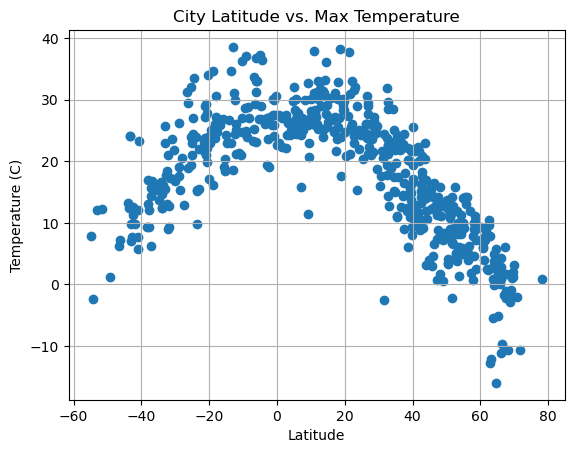

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\joemd\Desktop\python-api-challenge\WeatherPy\outputs\WeatherFig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

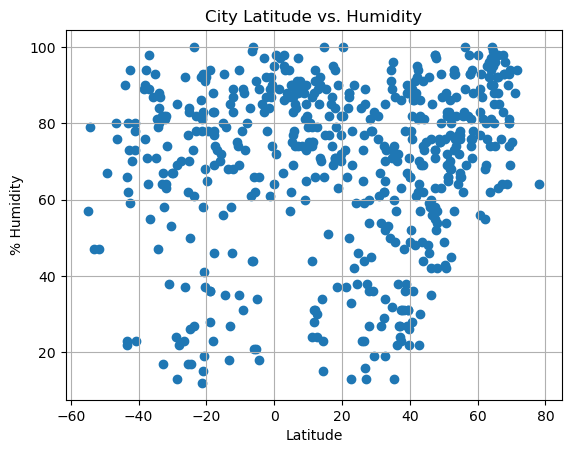

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("% Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("outputs/WeatherFig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

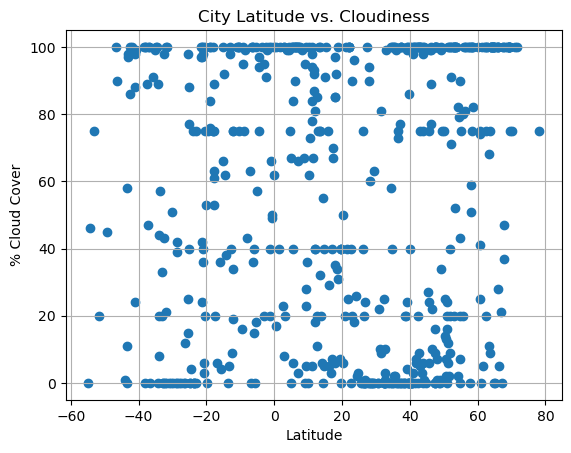

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("% Cloud Cover")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("outputs/WeatherFig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

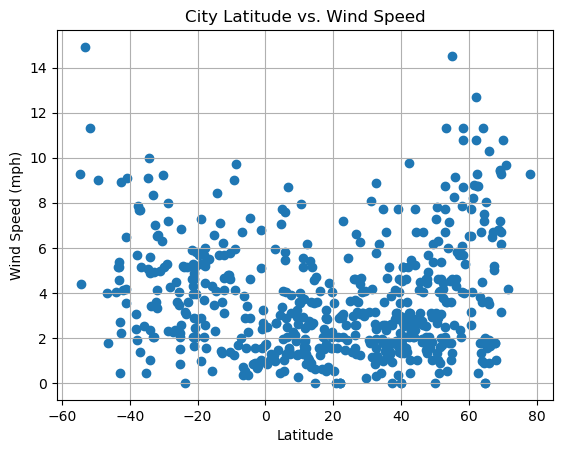

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("outputs/WeatherFig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: -0.5077830021136516


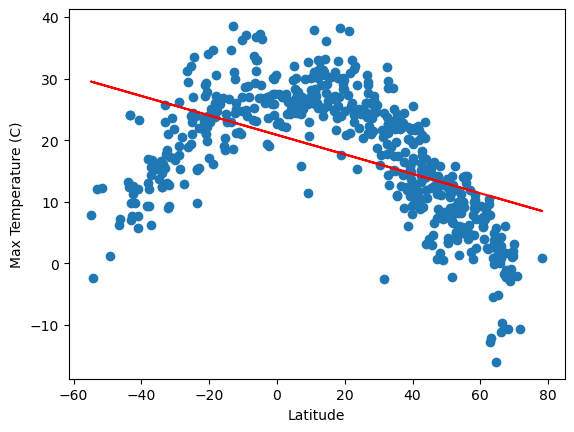

In [22]:
# Define a function to create Linear Regression plots
# Lat vs. Max Temp
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.11742317103164338


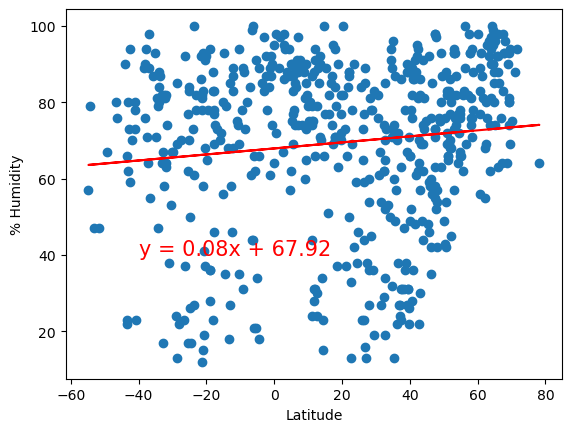

In [21]:
# Lat vs. Humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.038790387090040346


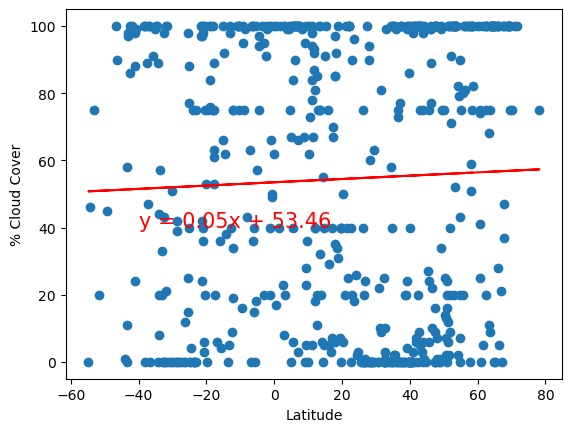

In [20]:
# Lat vs. Cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloud Cover')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.004061754693401546


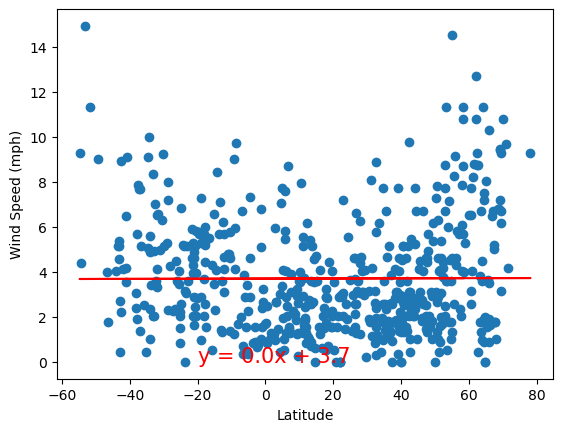

In [19]:
# Lat vs. Wind Speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nyurba,63.2842,118.3319,-12.16,92,11,1.79,RU,1697308723
1,keflavik,64.0049,-22.5624,4.95,81,100,3.60,IS,1697308726
3,constantia,44.1833,28.6500,15.39,81,1,5.24,RO,1697308731
4,pitkyaranta,61.5734,31.4792,8.62,81,5,8.80,RU,1697308733
7,medicine hat,50.0501,-110.6683,13.73,49,75,0.00,CA,1697308738


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lebu,-37.6167,-73.6500,12.15,71,89,7.86,CL,1697308728
5,edinburgh of the seven seas,-37.0676,-12.3116,14.39,98,100,7.69,SH,1697308735
6,ushuaia,-54.8000,-68.3000,7.81,57,0,9.26,AR,1697308737
11,adamstown,-25.0660,-130.1015,20.99,70,88,0.82,PN,1697308741
12,blackmans bay,-43.0167,147.3167,7.07,80,97,0.45,AU,1697308742


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8662726571467787


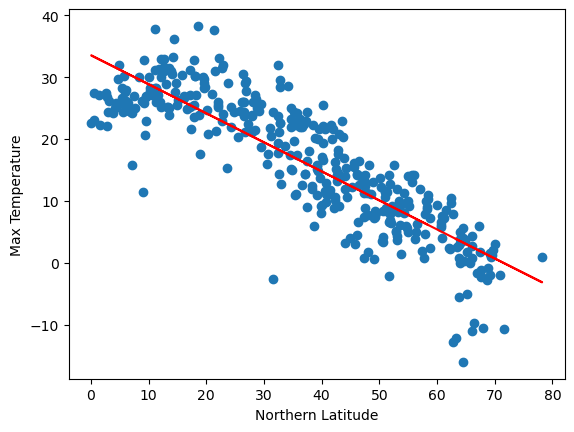

In [35]:
# Linear regression on Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of -0.866 suggests that a strong correaltion exists between latitude and maximum temperature in the Northern Hemisphere.

The r-value is: 0.7550009924018237


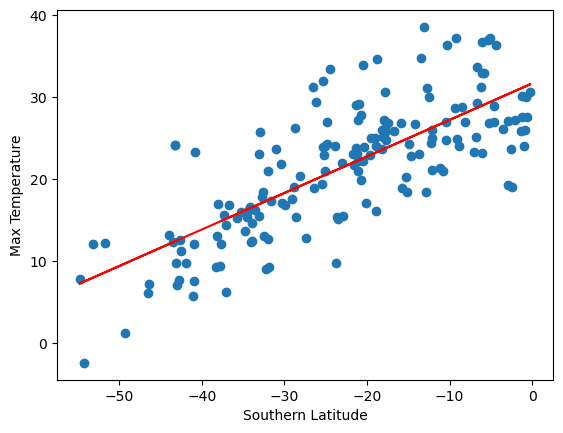

In [31]:
# Linear regression on Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of 0.755 suggests that a moderate to strong correlation exists between latitude and the maximum temperature in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10118496589896152


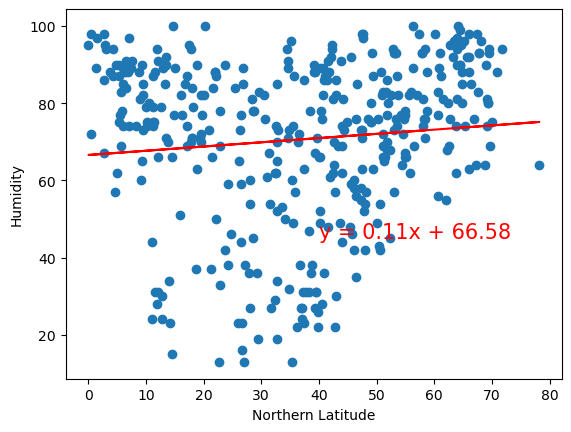

In [30]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of 0.101 suggests that a weak correlation exists between latitude and humidity in the northern hemisphere. 

The r-value is:0.05156730159184802


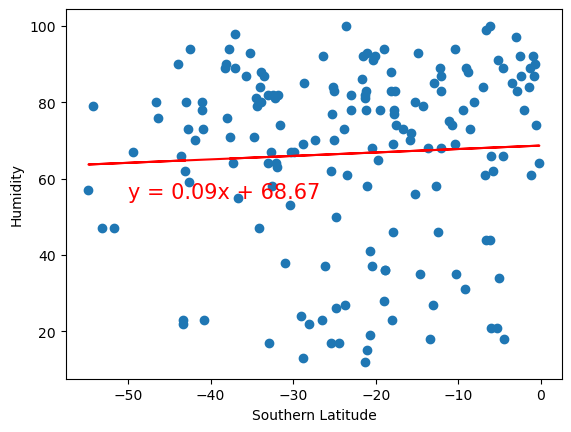

In [34]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of 0.052 suggests that a weak correlation exists between latitude and humidity in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09400338657512658


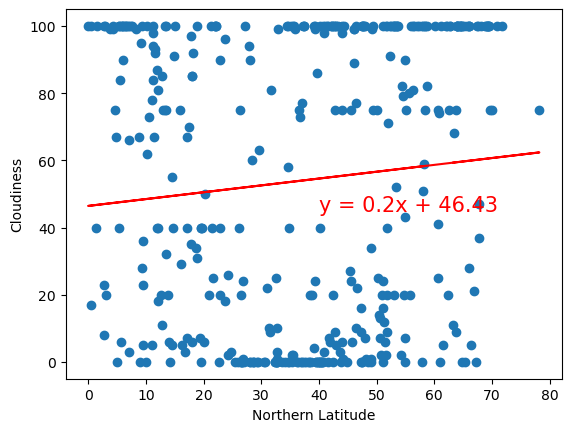

In [37]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of 0.094 suggests that there is not a strogn correlation between latitude and cloudiness in the northern hemisphere. 

The r-value is: 0.10941635858756266


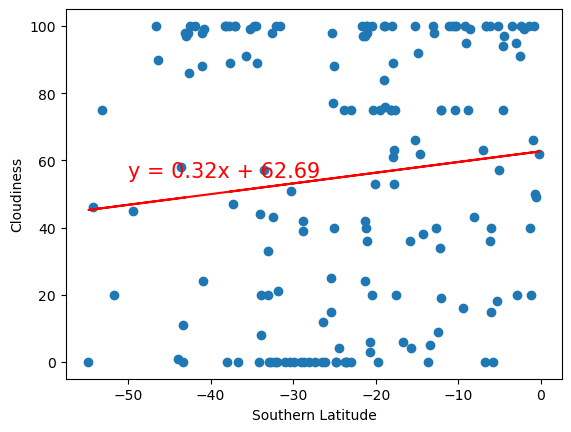

In [38]:
# Southern Hemisphere
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of 0.109 suggests that there is a weak correlation between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.3496020456926251


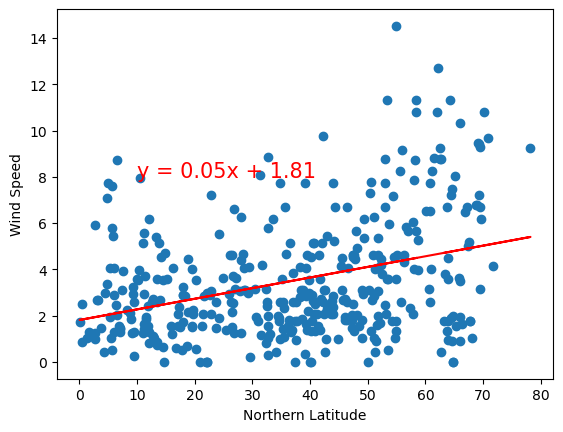

In [39]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of 0.350 suggests that a weak to moderate correlation exists between latitude and wind speed in the northern hemisphere. 

The r-value is: -0.3484204718291422


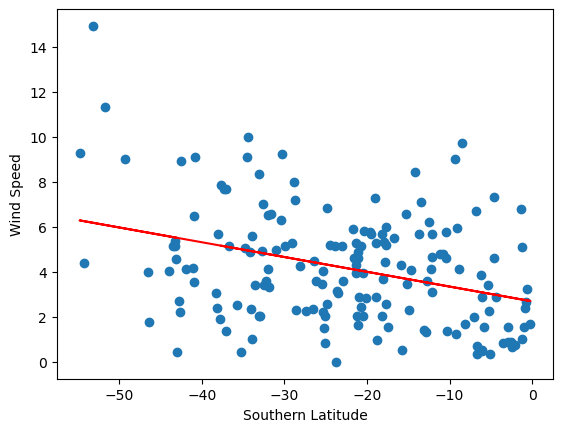

In [41]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of -0.348 suggests that a weak to moderate coreelation exists between latitude and wind speed in the southern hemisphere. 